In [72]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
import matplotlib.pyplot as plt
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import sklearn as sl
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor, export_text, DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import plot_tree


In [2]:
path = r"C:\Users\Δημήτρης\OneDrive\Έγγραφα\Giannis\MENG\semester8\Data Analysis\python_codes\Data Analysis_2024 1st Case_Data.csv"
df1 = pd.read_csv(path, index_col=False)
exr    = [2001, 2014]
exc     = ['Country', 'Status']

df2 = df1.drop(columns = exc)
cond1, cond2 = df2['Year'] == exr[0], df2['Year'] == exr[1]
df  = df2[~cond1]
df  = df[~cond2]

C:\Users\Δημήτρης\AppData\Local\Temp\ipykernel_27720\1715182839.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df  = df[~cond2]


In [3]:
predictors = df.columns.tolist()
predictors = [x for x in predictors if x != 'Life expectancy ' and x != 'Year']
X = pd.DataFrame(df[predictors])
Y = pd.DataFrame(df['Life expectancy '])

In [4]:
X

,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness 5-9 years,Income composition of resources,Schooling
0,263,0.01,71.279624,65,1154,19.1,83,6,8.16,65,0.1,584.259210,33736494.0,17.3,0.479,10.1
2,268,0.01,73.219243,64,430,18.1,89,62,8.13,64,0.1,631.744976,31731688.0,17.7,0.470,9.9
3,272,0.01,78.184215,67,2787,17.6,93,67,8.52,67,0.1,669.959000,3696958.0,18.0,0.463,9.8
4,275,0.01,7.097109,68,3013,17.2,97,68,7.87,68,0.1,63.537231,2978599.0,18.2,0.454,9.5
5,279,0.01,79.679367,66,1989,16.7,102,66,9.20,66,0.1,553.328940,2883167.0,18.4,0.448,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643,717,4.14,8.717409,65,420,27.5,43,69,6.44,68,30.3,444.765750,129432.0,9.0,0.406,9.3
1644,723,4.36,0.000000,68,31,27.1,42,67,7.13,65,33.6,454.366654,12777511.0,9.4,0.407,9.2
1645,715,4.06,0.000000,7,998,26.7,41,7,6.52,68,36.7,453.351155,12633897.0,9.9,0.418,9.5
1646,73,4.43,0.000000,73,304,26.3,40,73,6.53,71,39.8,57.348340,125525.0,1.3,0.427,10.0


In [6]:
ymean = np.mean(Y.values)
response = []
for i in Y.values:
    if i >= ymean:
        response.append(1)
    elif i<ymean:
        response.append(0)

print(response)
print(ymean)


X_train, X_test, y_train, y_test = train_test_split(X, response, test_size= 0.2, random_state=0)
print(np.mean(y_train))
print([len(X_train), len(X_test)])
print([len(y_train), len(y_test)])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

Max Depth tree = 3

In [76]:
tree3 = DecisionTreeClassifier(random_state= 0, max_depth= 3)
tree3.fit(X_train, y_train)
tree3_text = export_text(tree3)
print(tree3_text)

|--- feature_14 <= 0.63
|   |--- feature_5 <= 42.50
|   |   |--- feature_6 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_6 >  0.50
|   |   |   |--- class: 0
|   |--- feature_5 >  42.50
|   |   |--- feature_0 <= 204.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  204.50
|   |   |   |--- class: 0
|--- feature_14 >  0.63
|   |--- feature_0 <= 215.50
|   |   |--- feature_14 <= 0.71
|   |   |   |--- class: 1
|   |   |--- feature_14 >  0.71
|   |   |   |--- class: 1
|   |--- feature_0 >  215.50
|   |   |--- feature_14 <= 0.78
|   |   |   |--- class: 0
|   |   |--- feature_14 >  0.78
|   |   |   |--- class: 1



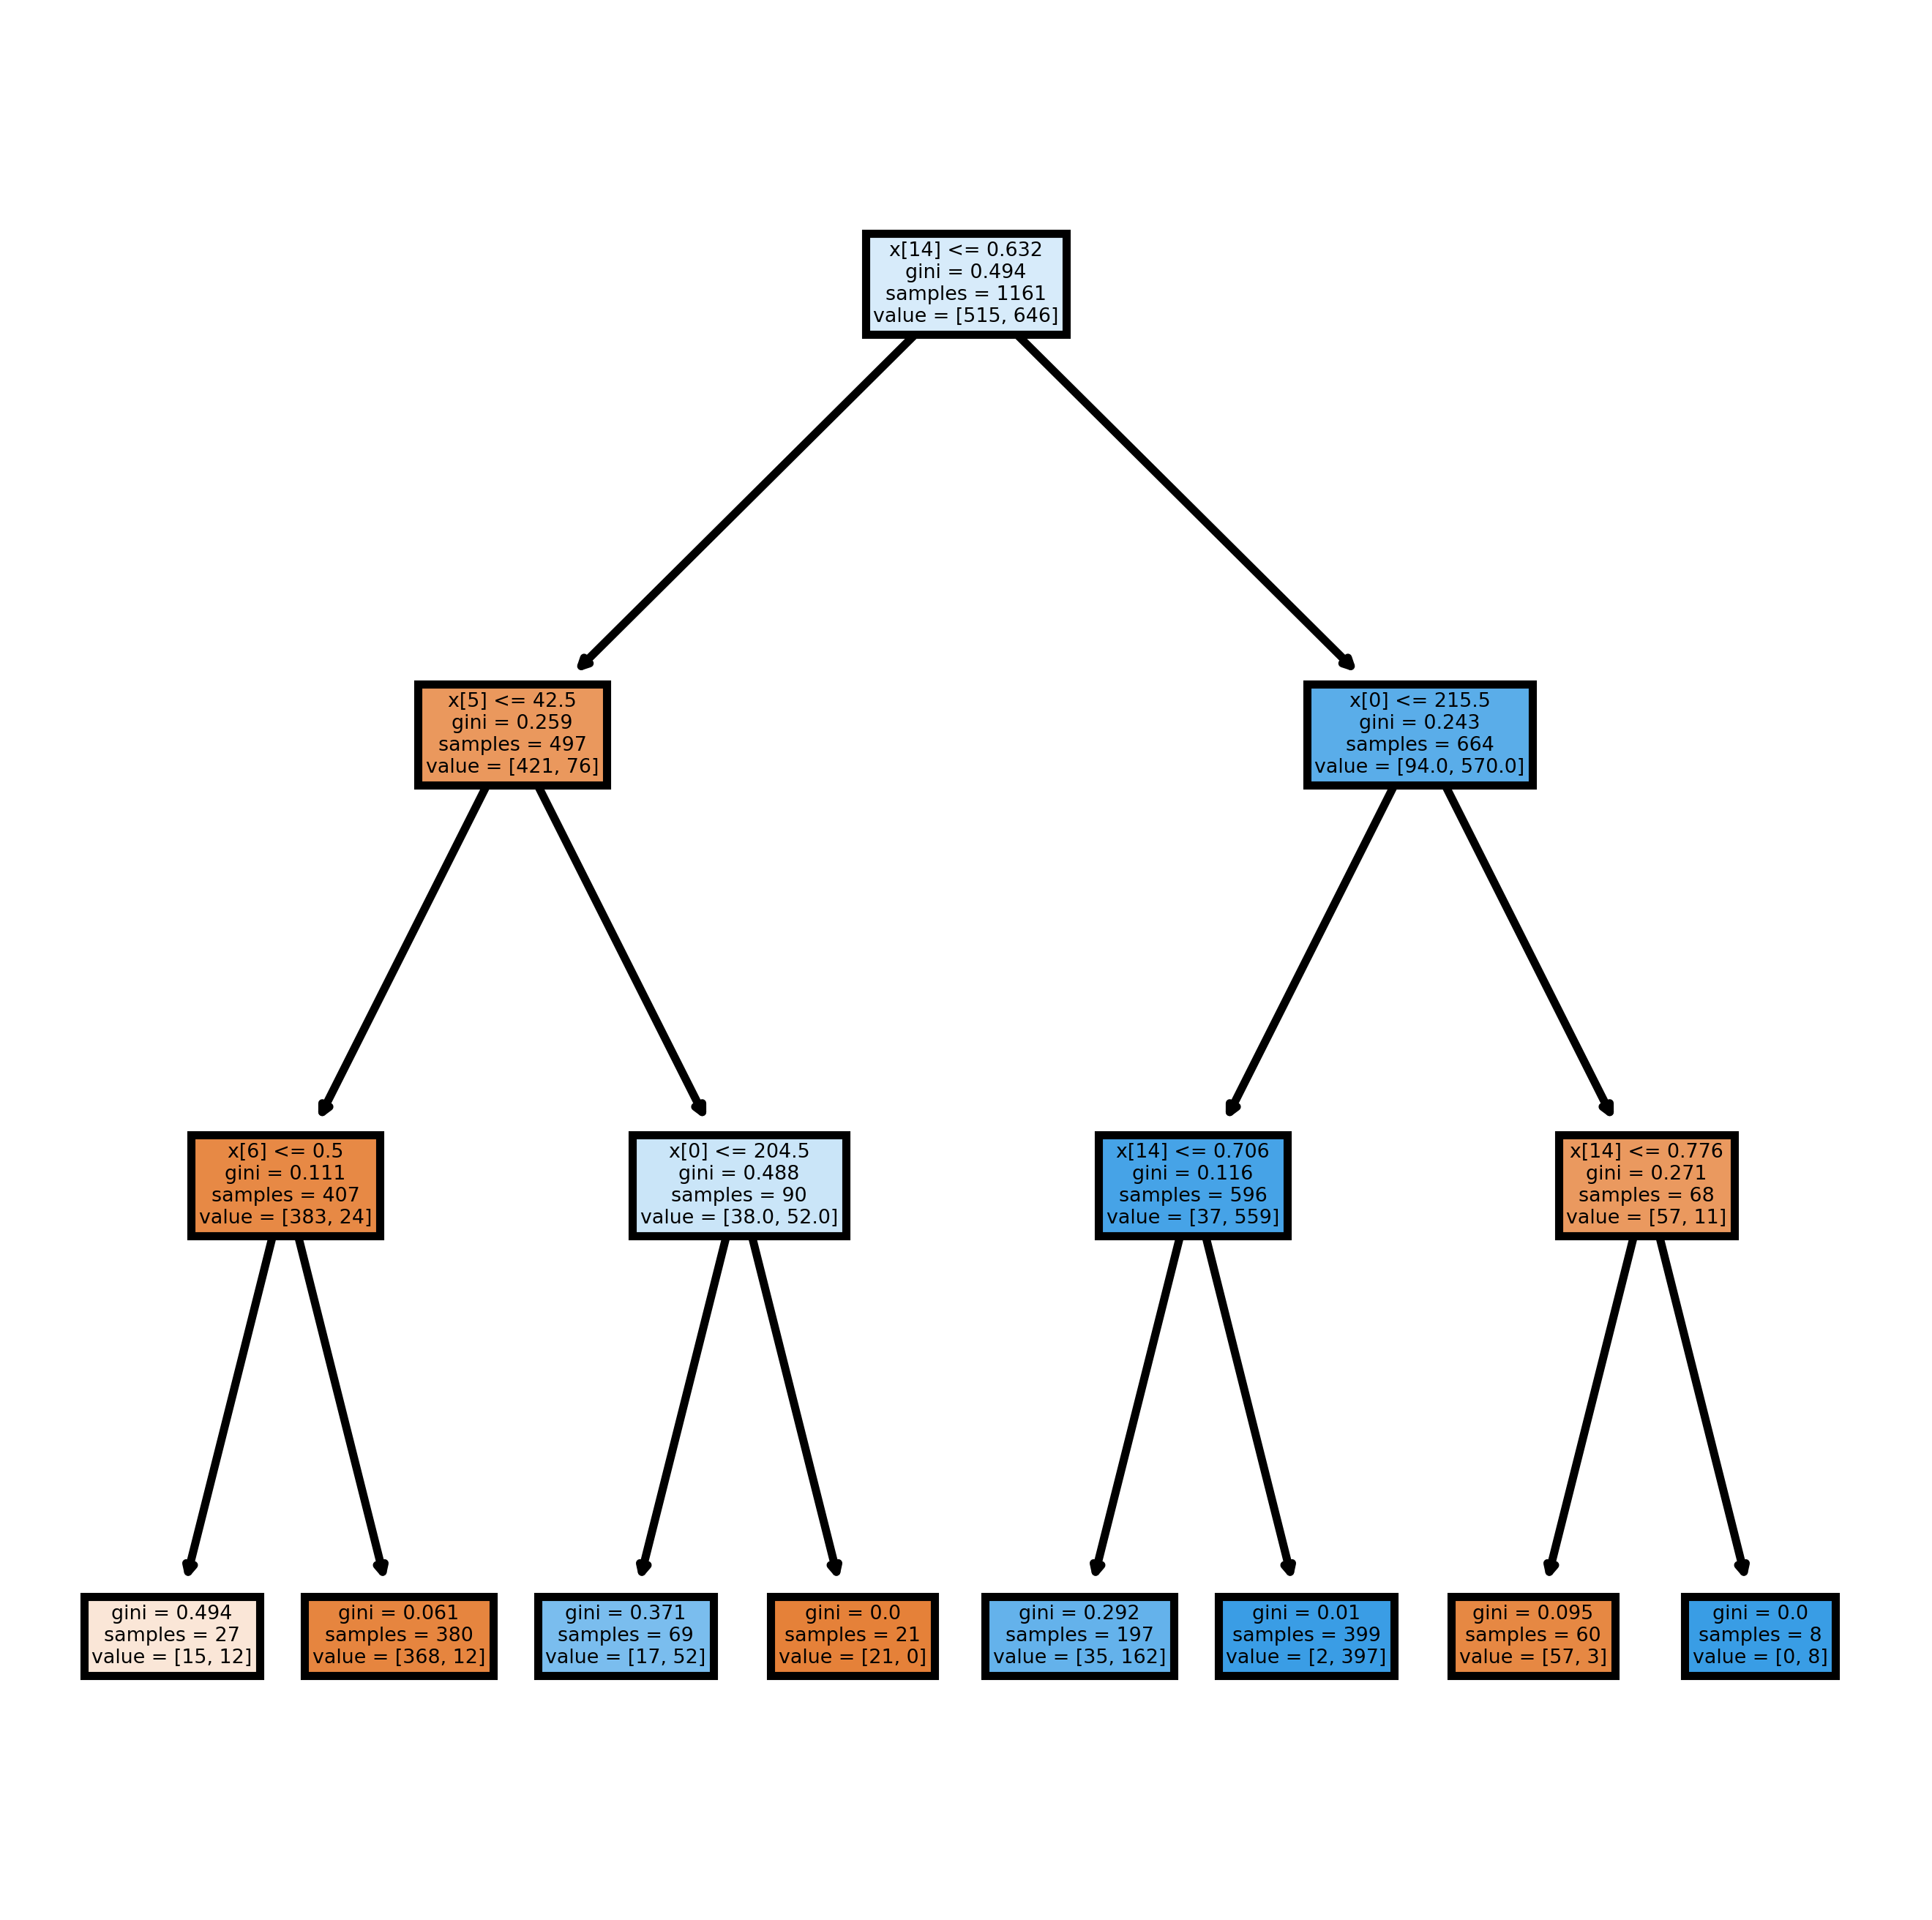

In [77]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=800)
plot_tree(tree3, filled=True)
plt.show()

In [78]:
y_predtree = tree3.predict(X_test)
y_pred_tree = (y_predtree >= 0.5).astype(int)
accuracy_tree = accuracy_score(y_test, y_predtree)
print("Depth 3 Tree accuracy:", accuracy_tree)

Depth 3 Tree accuracy: 0.9175257731958762


Bagging

In [79]:
tree = DecisionTreeClassifier(random_state=0)
base_classifier = tree
bagging = BaggingClassifier(base_classifier, n_estimators=200, random_state=0)

# train the bagging estimator on the training data
bagging.fit(X_train, y_train)

# evaluate the bagging estimator on the testing data
y_predbag = bagging.predict(X_test)
y_pred_bag = (y_predbag >= 0.5).astype(int)
accuracy_bag = accuracy_score(y_test, y_predbag)
print("Bagging Tree accuracy:", accuracy_bag)

Bagging Tree accuracy: 0.979381443298969


Random Forest

In [62]:
# define a random forest estimator
rf = RandomForestClassifier(n_estimators=200, random_state=0, max_features= np.sqrt(len(predictors)).astype(int))

# train the random forest estimator on the training data
rf.fit(X_train, y_train)

# evaluate the random forest estimator on the testing data
y_predrf = rf.predict(X_test)
y_pred_rf = (y_predrf >= 0.5).astype(int)
accuracy_rf = accuracy_score(y_test, y_predrf)
print("Random Forest accuracy:", accuracy_rf)

Random Forest accuracy: 0.9896907216494846


Boosting

In [80]:
# define a Gradient Boosting estimator
gbr = GradientBoostingClassifier(n_estimators=200, learning_rate=1, max_depth=1,random_state=0)

# train the Gradient Boosting estimator on the training data
gbr.fit(X_train, y_train)

# evaluate the Gradient Boosting estimator on the testing data
y_predboost = gbr.predict(X_test)
y_pred_boost = (y_predboost >= 0.5).astype(int)
accuracy_boost = accuracy_score(y_test, y_predboost)
print("Boosting accuracy:", accuracy_boost)


Boosting accuracy: 0.993127147766323


Subtask 5

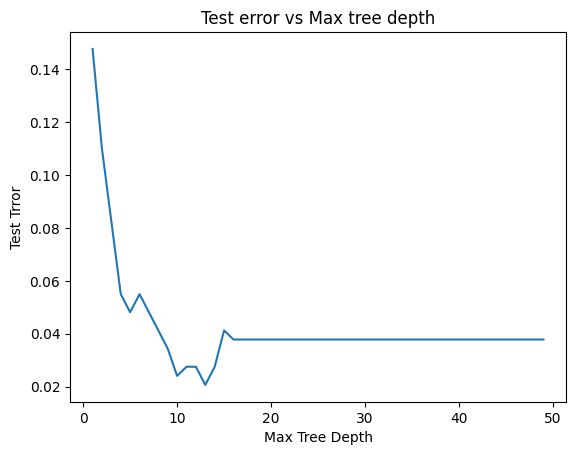

Min error: 0.020618556701030966 at depth: 13


In [87]:
max_depth_array = np.arange(1,50,1)

errors = []
for i in max_depth_array:
    tree = DecisionTreeClassifier(random_state= 0, max_depth= i)
    tree.fit(X_train, y_train)
    y_predi = tree.predict(X_test)
    y_pred_i = (y_predi >= 0.5).astype(int)
    accuracy_i = accuracy_score(y_test, y_predi)
    error = 1 - accuracy_i
    errors.append(error)

plt.figure()
plt.plot(max_depth_array, errors)
plt.title('Test error vs Max tree depth')
plt.xlabel('Max Tree Depth')
plt.ylabel('Test Trror')
plt.show()

errormin = min(errors)
indx = errors.index(errormin)
print(f'Min error: {errormin} at depth: {max_depth_array[indx]}')

Subtask 6

In [86]:
n_est_array = np.arange(1,2000,25)

bagerror    = []
rferror     = []
bsterror    = []
for i in n_est_array:
    ##############################################
    # Bagging
    tree = DecisionTreeClassifier(random_state=0)
    base_regressor = tree
    bagging = BaggingClassifier(base_regressor, n_estimators=i, random_state=0)

    # train the bagging estimator on the training data
    bagging.fit(X_train, y_train)

    # evaluate the bagging estimator on the testing data
    y_predbag = bagging.predict(X_test)
    y_pred_bag = (y_predbag >= 0.5).astype(int)
    accuracy_bag = accuracy_score(y_test, y_predbag)
    error_bag = 1 - accuracy_bag
    bagerror.append(error_bag)

    ##############################################
    # Random forest
    rf = RandomForestClassifier(n_estimators=i, random_state=0, max_features= np.sqrt(len(predictors)).astype(int))

    # train the random forest estimator on the training data
    rf.fit(X_train, y_train)

    # evaluate the random forest estimator on the testing data
    y_predrf = rf.predict(X_test)
    y_pred_rf = (y_predrf >= 0.5).astype(int)
    accuracy_rf = accuracy_score(y_test, y_predrf)
    error_rf = 1 - accuracy_rf
    rferror.append(error_rf)

    ##############################################
    # Boosting
    # define a Gradient Boosting estimator
    gbr = GradientBoostingClassifier(n_estimators=i, learning_rate=1, max_depth=1,random_state=0)

    # train the Gradient Boosting estimator on the training data
    gbr.fit(X_train, y_train)

    # evaluate the Gradient Boosting estimator on the testing data
    y_predboost = gbr.predict(X_test)
    y_pred_boost = (y_predboost >= 0.5).astype(int)
    accuracy_boost = accuracy_score(y_test, y_predboost)
    error_boost = 1 - accuracy_boost
    bsterror.append(error_boost)
    print(i)

print(bsterror)


1
26
51
76
101
126
151
176
201
226
251
276
301
326
351
376
401
426
451
476
501
526
551
576
601
626
651
676
701
726
751
776
801
826
851
876
901
926
951
976
1001
1026
1051
1076
1101
1126
1151
1176
1201
1226
1251
1276
1301
1326
1351
1376
1401
1426
1451
1476
1501
1526
1551
1576
1601
1626
1651
1676
1701
1726
1751
1776
1801
1826
1851
1876
1901
1926
1951
1976
[0.147766323024055, 0.030927835051546393, 0.013745704467353903, 0.013745704467353903, 0.010309278350515427, 0.0068728522336769515, 0.010309278350515427, 0.010309278350515427, 0.0068728522336769515, 0.0068728522336769515, 0.0068728522336769515, 0.0068728522336769515, 0.010309278350515427, 0.010309278350515427, 0.0034364261168384758, 0.0034364261168384758, 0.0034364261168384758, 0.0034364261168384758, 0.0034364261168384758, 0.0034364261168384758, 0.0034364261168384758, 0.0034364261168384758, 0.0034364261168384758, 0.0034364261168384758, 0.0034364261168384758, 0.0034364261168384758, 0.0034364261168384758, 0.0034364261168384758, 0.0034364261

In [88]:
dfsave = pd.DataFrame({
    'n-estimators': n_est_array,
    'Bagging': bagerror,
    'Random Forest': rferror,
    'Boosting': bsterror
})

dfsave.to_csv('n_est_csv_final.txt', sep = ',', index = False)

In [89]:
dfsave1 = pd.read_csv(r"C:\Users\Δημήτρης\OneDrive\Έγγραφα\Giannis\MENG\semester8\Data Analysis\python_codes\n_est_csv_final.txt")
#dfsave2 = pd.read_csv(r"C:\Users\Δημήτρης\OneDrive\Έγγραφα\Giannis\MENG\semester8\Data Analysis\python_codes\n_est_csv2.txt")

# nest = pd.concat([dfsave1["n-estimators"], dfsave2["n-estimators"]])
# nest_list = nest.tolist()
# bag = pd.concat([dfsave1["Bagging"], dfsave2["Bagging"]])
# bag_list = bag.tolist()
# rf_pd = pd.concat([dfsave1["Random Forest"], dfsave2["Random Forest"]])
# rf_list = rf_pd.tolist()
# boost = pd.concat([dfsave1["Boosting"], dfsave2["Boosting"]])
# bst_list = boost.tolist()

nest_list = dfsave1['n-estimators'].tolist()
bag_list = dfsave1['Bagging'].tolist()
rf_list = dfsave1['Random Forest'].tolist()
bst_list = dfsave1['Boosting'].tolist()


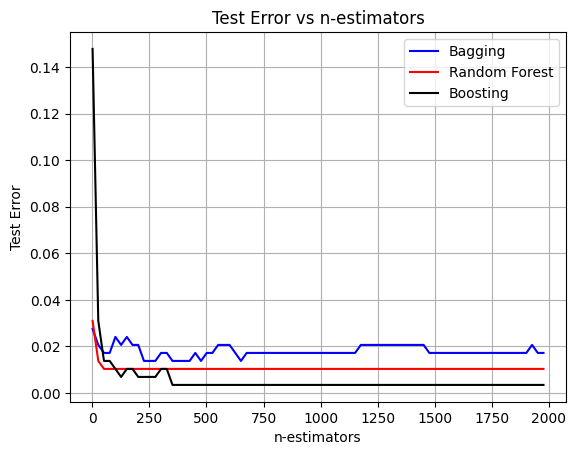

In [90]:
#dfsave1 = pd.read_csv(r"C:\Users\Δημήτρης\OneDrive\Έγγραφα\Giannis\MENG\semester8\Data Analysis\python_codes\n_est_csv.txt")

fig, ax = plt.subplots()

# Plot the three lines with labels
ax.plot(nest_list, bag_list,'b', label='Bagging')
ax.plot(nest_list, rf_list,'r', label='Random Forest')
ax.plot(nest_list, bst_list,'k', label='Boosting')

# Add a legend
ax.legend()

# Add labels to the axes
ax.set_xlabel('n-estimators')
ax.set_ylabel('Test Error')

# Add a title to the plot
ax.set_title('Test Error vs n-estimators')

# Display the plot
plt.grid()
plt.show()